# __Capstone Project__ - Bicycles Accident Analysis
### **Mohammad Nurrokim** - Applied Data Science Capstone by IBM/Coursera 

<hr>

![Bicyle](https://images.pexels.com/photos/310983/pexels-photo-310983.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)

<center><i>Now, cyclists are increasing in several countries because cycling is a safe alternative sport during a pandemic. But, we also need to pay attention to cycling safety on the road. </i></center>

<h2>Table of contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#introduction">Introduction: Business Problem</a></li>
        <li><a href="#data">Data</a></li>
        <li><a href="#methodology">Methodology</a></li>
        <li><a href="#analysis">Analysis</a></li>
        <li><a href="#results">Results and Discussion</a></li>
        <li><a href="#conclusion">Conclusion</a></li>
    </ol>
        
</div>
 
<hr>

# __Introduction: ``Business Problem``__ <a name="introduction"></a>

This report will try to analyze the best location and time for cycling activities. Specifically, this project will target stakeholders interested in **cycling activities** such as individual cyclists, cycling communities, and companies/sponsors/event organizers of cycling activities.

During a pandemic, many people choose cycling as an alternative to sports. Cycling is considered the safest way to exercise because of minimal contact with other people. There are many accidents involving cyclists. Cyclists also need protection and a sense of security while on the road. Cycling is not only interpreted as transportation activity, but also sports and recreational activities.

When an accident occurs, car drivers are still protected by car frames and car safety technology in comparison. So, the chances of surviving or being injured are still relatively low compared to cyclists. Cyclists are only protected by wearing helmets on their heads. When an accident occurs, their bodies, feet, and hands have the potential to be injured.

This project will assist the Seattle Department of Transportation (SDOT) to provide different traffic signs in accident-prone areas for cyclists.  This project will also help the [cyclist community](http://wabikes.org/growing-bicycling/resources/bike-clubs-in-washington-state/) like **Cascade Bicylcle Club, COGS (Cyclists Of Greater Seattle), Brake the Cycle, etc.** to find out the right track and time to hold a cycling event.

Many events are held by many cyclist communities, like Cascade Bicycle Club, for example.. This club hosts **several major riding events** every year including Chilly Hilly, Seattle Bike-n-Brews, Ride for Major Taylor, Flying Wheels Summer Century, Woodinville Wine Ride, Seattle Night Ride, the Red-Bell 100, Seattle to Portland (STP), Ride from Seattle to Vancouver and Party (RSVP), Ride Around Washington (RAW), High Pass Challenge (HPC), and Kitsap Color Classic (KCC) ([Wikipedia](https://en.wikipedia.org/wiki/Cascade_Bicycle_Club#Major_events)). This project can help **companies, sponsors, and event organizers** to create **safe cycling events** for all participants.

<hr>

# __Data__ <a name="data"></a>

Based on definition of our problem, features or columns that will influence our analysis are:
1. **Location**: Latitude (X), Longitude (Y), Address Type (ADDRTYPE)
2. **Severity**:  A code that corresponds to the severity of the collision (SEVERITYCODE), a detailed description of the severity of the collision (SEVERITYDESC)
3. **Person Count**: Total number of people involved (PERSONCOUNT), number of bicycles involved in the collision  (PEDCYLCOUNT)
4. **Date**: The date and time of the incident (INCDTTM)
5. **Condition**: Description of the weather conditions (WEATHER), condition of the road (ROADCOND), light conditions during the collision (LIGHTCOND)

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>Attribute Information</h4>
</div>

| Attribute | Data Type, Length | Description |
| --- | --- | ---|
| OBJECTID | Long | ESRI unique identifier |
| SHAPE | Geometry | ESRI geometry field |
| INCKEY | Long | A unique key for the incident |
| ADDRTYPE | Text, 12 | Collision address type: Alley, Block, Intersection |
| INTKEY | Double | Key that corresponds to the intersection associated with a collision |
| LOCATION | Text, 255 | Description of the general location of the collision |
| EXCEPTRSNCODE | Text, 10 | |
| EXCEPTRSNDESC | Text, 300 | |
| SEVERITYCODE | Text, 100 | A code that corresponds to the severity of the collision: 3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown |
| SEVERITYDESC | Text | A detailed description of the severity of the collision |
| COLLISIONTYPE | Text, 300 | Collision Type |
| PERSONCOUNT | Double | The total number of people involved in the collision |
| PEDCOUNT | Double | The number of pedestrians involved in the collision. This is entered by the state. |
| PEDCYLCOUNT | Double | The number of bicycles involved in the collision. This is entered by the state. |
| VEHCOUNT | Double | The number of vehicles involved in the collision. This is entered by the state. |
| INCDATE | Date | The date of the incident. |
| INCDTTM | Text, 30 | The date and time of the incident. |
| JUNCTIONTYPE | Text, 300 | Category of junction at which collision took place |
| SDOT_COLCODE | Text, 10 | A code given to the collision by SDOT. |
| SDOT_COLDESC | Text, 300 | A description of the collision corresponding to the collision code. |
| INATTENTIONIND | Text, 1 | Whether or not collision was due to inattention. (Y/N) |
| UNDERINFL | Text, 10 | Whether or not a driver involved was under the influence of drugs or alcohol. |
| WEATHER | Text, 300 | A description of the weather conditions during the time of the collision. |
| ROADCOND | Text, 300 | The condition of the road during the collision. |
| LIGHTCOND | Text, 300 | The light conditions during the collision. |
| PEDROWNOTGRNT | Text, 1 | Whether or not the pedestrian right of way was not granted. (Y/N) |
| SDOTCOLNUM | Text, 10 | A number given to the collision by SDOT. |
| SPEEDING | Text, 1 | Whether or not speeding was a factor in the collision. (Y/N) |
| ST_COLCODE | Text, 10 | A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary. | 
| ST_COLDESC | Text, 300 | A description that corresponds to the state’s coding designation. |
| SEGLANEKEY | Long | A key for the lane segment in which the collision occurred. |
| CROSSWALKKEY | Long | A key for the crosswalk at which the collision occurred. |
| HITPARKEDCAR | Text, 1 | Whether or not the collision involved hitting a parked car. (Y/N) |


<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>Open Dataset</h4>
</div>

We import some of the libraries needed for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, jaccard_similarity_score, log_loss
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline 
pd.set_option('display.max_columns', None)

The dataset is opened using pd.read_csv()

In [2]:
data = pd.read_csv('Data-Collisions.csv')

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>Conditional Selection - Only show data that  bicycles involved in the collision</h4>
</div>

In the explanation of the problem above, we will help solve the problem for cyclists. We limit data on car accidents involving cyclists. So the PEDCYLCOUNT column must be greater than zero.

In [3]:
# Conditional selection, column 'PEDCYLCOUNT' greater than 0
data = data[data['PEDCYLCOUNT']>0].reset_index()
data.head(3)

index  SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0      7             2 -122.320780  47.614076         9  330897     332397   
1     25             2 -122.312857  47.599218        34  320932     322432   
2     52             2 -122.328913  47.613466        62    1290       1290   

  REPORTNO   STATUS      ADDRTYPE   INTKEY  \
0  EA30304  Matched  Intersection  29745.0   
1  E926429  Matched         Block      NaN   
2  3581633  Matched  Intersection  29878.0   

                                         LOCATION EXCEPTRSNCODE EXCEPTRSNDESC  \
0                          BROADWAY AND E PIKE ST                         NaN   
1  S JACKSON ST BETWEEN 14TH AVE S AND 16TH AVE S                         NaN   
2                           BOREN AVE AND PIKE ST                         NaN   

   SEVERITYCODE.1      SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  \
0               2  Injury Collision        Cycles            3         0   
1               2  Injury Collision        Cycles            2         0   
2               2  Injury Collision        Cycles            3         0   

   PEDCYLCOUNT  VEHCOUNT                 INCDATE                INCDTTM  \
0            1         1  2020/04/15 00:00:00+00   4/15/2020 5:47:00 PM   
1            1         1  2019/04/25 00:00:00+00   4/25/2019 9:40:00 AM   
2            1         1  2013/03/29 00:00:00+00  3/29/2013 11:53:00 AM   

                              JUNCTIONTYPE  SDOT_COLCODE  \
0   At Intersection (intersection related)            51   
1  Mid-Block (not related to intersection)            18   
2   At Intersection (intersection related)            18   

                                        SDOT_COLDESC INATTENTIONIND UNDERINFL  \
0  PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...            NaN         N   
1  MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...              Y         N   
2  MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...            NaN         N   

  WEATHER ROADCOND LIGHTCOND PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0   Clear      Dry  Daylight           NaN         NaN      NaN          5   
1   Clear      Dry  Daylight           NaN         NaN      NaN          5   
2   Clear      Dry   Unknown             Y         NaN      NaN         45   

                     ST_COLDESC  SEGLANEKEY  CROSSWALKKEY HITPARKEDCAR  
0  Vehicle Strikes Pedalcyclist        6855             0            N  
1  Vehicle Strikes Pedalcyclist           0             0            N  
2        Vehicle - Pedalcyclist       25242             0            N

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>DataFrame Shape</h4>
</div>    

The dataset used is (5484 rows, 38 columns). Not all columns will be used, will be selected according to the data description above.

In [4]:
data.shape

(5484, 39)

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>DataFrame Data Type and Missing Values</h4>
</div>

In the description below, we will know the data types and missing values and their presentations.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           5484 non-null   int64  
 1   SEVERITYCODE    5484 non-null   int64  
 2   X               5447 non-null   float64
 3   Y               5447 non-null   float64
 4   OBJECTID        5484 non-null   int64  
 5   INCKEY          5484 non-null   int64  
 6   COLDETKEY       5484 non-null   int64  
 7   REPORTNO        5484 non-null   object 
 8   STATUS          5484 non-null   object 
 9   ADDRTYPE        5480 non-null   object 
 10  INTKEY          3142 non-null   float64
 11  LOCATION        5472 non-null   object 
 12  EXCEPTRSNCODE   3117 non-null   object 
 13  EXCEPTRSNDESC   87 non-null     object 
 14  SEVERITYCODE.1  5484 non-null   int64  
 15  SEVERITYDESC    5484 non-null   object 
 16  COLLISIONTYPE   5468 non-null   object 
 17  PERSONCOUNT     5484 non-null   i

**Missing Values Percentage**

In [6]:
pd.DataFrame(data = [round(i/len(data) * 100, 2) for i in data.isna().sum().to_list()],
            index = data.columns,
            columns = ['Missing Values (%)']).T

index  SEVERITYCODE     X     Y  OBJECTID  INCKEY  \
Missing Values (%)    0.0           0.0  0.67  0.67       0.0     0.0   

                    COLDETKEY  REPORTNO  STATUS  ADDRTYPE  INTKEY  LOCATION  \
Missing Values (%)        0.0       0.0     0.0      0.07   42.71      0.22   

                    EXCEPTRSNCODE  EXCEPTRSNDESC  SEVERITYCODE.1  \
Missing Values (%)          43.16          98.41             0.0   

                    SEVERITYDESC  COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  \
Missing Values (%)           0.0           0.29          0.0       0.0   

                    PEDCYLCOUNT  VEHCOUNT  INCDATE  INCDTTM  JUNCTIONTYPE  \
Missing Values (%)          0.0       0.0      0.0      0.0          0.71   

                    SDOT_COLCODE  SDOT_COLDESC  INATTENTIONIND  UNDERINFL  \
Missing Values (%)           0.0           0.0           83.77        0.0   

                    WEATHER  ROADCOND  LIGHTCOND  PEDROWNOTGRNT  SDOTCOLNUM  \
Missing Values (%)     0.09      0.09       0.11          68.27       49.33   

                    SPEEDING  ST_COLCODE  ST_COLDESC  SEGLANEKEY  \
Missing Values (%)     97.78        0.29        0.29         0.0   

                    CROSSWALKKEY  HITPARKEDCAR  
Missing Values (%)           0.0           0.0

<hr>

# __Methodology__ <a name="methodology"></a>

#### **1. Features Selection**
Not all features are used for analysis in this project. Thus, only some data is displayed and analyzed.

#### **2. Handling Missing Values**
Missing values will interfere with the prediction and analysis results. So, we need to handle the missing values ​​by deleting them or filling them in. If there are not too many missing values, we can choose the option to delete them.

#### **3. Handling Duplicates Values**
Duplicate values will also interfere with the analysis and prediction results. First, we need to detect the number of duplicate values ​​in the dataset. Next, these duplicate values need to be removed to make the dataset cleaner.

#### **4. Convert 'INCDTTM' Column to Datetime Type**
'ICDDTM' Column needs to be changed in the DateTime type. Because by converting it to a DateTime type, we can extract hour, day, month, and year data. These data can help us to analyze data more deeply.

#### **5. Exploratory Data Analysis (EDA)**
After cleaning the data, we can run the exploratory data analysis. The analysis framework follows the problem we have defined, namely finding the best time and location for cycling activities.

First, the data will be explored and analyzed based on data related to time, such as the hour, day, month, year, and weather. The data is visualized to get an overview of the best time to hold a cycling event. Second, looking for an overview of the conditions for the best place to hold a cycling event. The data visualized include light conditions, road conditions, and address types.

#### **6. Model Building**
The machine learning model used in this project is logistic regression. Why use logistic regression? First, the data is binary. Second, we need probabilistic results to find out the time and place conditions that are most likely to cause injury collision. Before model building, the data will be encoded using the one-hot encoder and split into training and testing data.


<hr>

# __Analysis__ <a name="analysis"></a>

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>Data Cleaning</h4>
</div>    

### **``Features Selection``**

We use features that give support to solve the problems that have been planned.

In [7]:
df = data[['SEVERITYCODE', 'SEVERITYDESC', 'X', 'Y', 'ADDRTYPE', 'PERSONCOUNT', 'INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
df.head(3)

SEVERITYCODE      SEVERITYDESC           X          Y      ADDRTYPE  \
0             2  Injury Collision -122.320780  47.614076  Intersection   
1             2  Injury Collision -122.312857  47.599218         Block   
2             2  Injury Collision -122.328913  47.613466  Intersection   

   PERSONCOUNT                INCDTTM WEATHER ROADCOND LIGHTCOND  
0            3   4/15/2020 5:47:00 PM   Clear      Dry  Daylight  
1            2   4/25/2019 9:40:00 AM   Clear      Dry  Daylight  
2            3  3/29/2013 11:53:00 AM   Clear      Dry   Unknown

### **``Handling Missing Values``**

In the table below, we can see that the missing values ​​in all features are below 1 per cent.

**Missing Values Percentage**


In [8]:
pd.DataFrame(data = [round(i/len(df) * 100, 2) for i in df.isna().sum().to_list()],
            index = df.columns,
            columns = ['Missing Values (%)']).T

SEVERITYCODE  SEVERITYDESC     X     Y  ADDRTYPE  \
Missing Values (%)           0.0           0.0  0.67  0.67      0.07   

                    PERSONCOUNT  INCDTTM  WEATHER  ROADCOND  LIGHTCOND  
Missing Values (%)          0.0      0.0     0.09      0.09       0.11

Because the missing values are minimal (less than 1 per cent), we can decide to delete the missing values in all features.

**Drop Missing Values**

In [9]:
df = df.dropna()

In [10]:
pd.DataFrame(data = [round(i/len(df) * 100, 2) for i in df.isna().sum().to_list()],
            index = df.columns,
            columns = ['Missing Values (%)']).T

SEVERITYCODE  SEVERITYDESC    X    Y  ADDRTYPE  \
Missing Values (%)           0.0           0.0  0.0  0.0       0.0   

                    PERSONCOUNT  INCDTTM  WEATHER  ROADCOND  LIGHTCOND  
Missing Values (%)          0.0      0.0      0.0       0.0        0.0

### **``Handling Duplicate Values``**

We also need to check the data if there is duplicate data. Many duplicate values will affect the analysis and prediction results. Therefore we need to detect the amount of duplicate data. Then we delete the duplicate value.

In [11]:
df.duplicated().sum()

4

In the output above, there are four duplicate data. After that, we drop these duplicate values ​​from the dataset. So, we get a cleaner dataset for analysis.

In [12]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### **``Convert 'INCDTTM' Column to DateTime Type``**

Below, we can see that the 'INCDTTM' Column type is still an 'object'.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5483
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEVERITYCODE  5432 non-null   int64  
 1   SEVERITYDESC  5432 non-null   object 
 2   X             5432 non-null   float64
 3   Y             5432 non-null   float64
 4   ADDRTYPE      5432 non-null   object 
 5   PERSONCOUNT   5432 non-null   int64  
 6   INCDTTM       5432 non-null   object 
 7   WEATHER       5432 non-null   object 
 8   ROADCOND      5432 non-null   object 
 9   LIGHTCOND     5432 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 339.5+ KB


After changing to DateTime type, column 'INCDTTM' changes to 'datetime64.'

In [14]:
df["INCDTTM"]= pd.to_datetime(df["INCDTTM"]) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5483
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SEVERITYCODE  5432 non-null   int64         
 1   SEVERITYDESC  5432 non-null   object        
 2   X             5432 non-null   float64       
 3   Y             5432 non-null   float64       
 4   ADDRTYPE      5432 non-null   object        
 5   PERSONCOUNT   5432 non-null   int64         
 6   INCDTTM       5432 non-null   datetime64[ns]
 7   WEATHER       5432 non-null   object        
 8   ROADCOND      5432 non-null   object        
 9   LIGHTCOND     5432 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 360.7+ KB


After converting to 'datetime64', we can extract the data into new columns such as hour, day, month, and year.

In [16]:
df['HOUR'] = df["INCDTTM"].dt.hour
df['DAY'] = df["INCDTTM"].dt.day_name()
df['MONTH'] = df["INCDTTM"].dt.month
df['YEAR'] = df["INCDTTM"].dt.year 

month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df['MONTH'] = df['MONTH'].apply(lambda x: month[x])
df.head()

SEVERITYCODE                    SEVERITYDESC           X          Y  \
0             2                Injury Collision -122.320780  47.614076   
1             2                Injury Collision -122.312857  47.599218   
2             2                Injury Collision -122.328913  47.613466   
3             1  Property Damage Only Collision -122.312464  47.652976   
4             2                Injury Collision -122.337054  47.695963   

       ADDRTYPE  PERSONCOUNT             INCDTTM WEATHER ROADCOND LIGHTCOND  \
0  Intersection            3 2020-04-15 17:47:00   Clear      Dry  Daylight   
1         Block            2 2019-04-25 09:40:00   Clear      Dry  Daylight   
2  Intersection            3 2013-03-29 11:53:00   Clear      Dry   Unknown   
3  Intersection            2 2013-03-28 15:30:00   Clear      Dry  Daylight   
4         Block            1 2004-10-11 16:00:00   Clear      Dry  Daylight   

   HOUR        DAY    MONTH  YEAR  
0    17  Wednesday    April  2020  
1     9   Thursday    April  2019  
2    11     Friday    March  2013  
3    15   Thursday    March  2013  
4    16     Monday  October  2004

<hr>

## **``Explanatory Data Analysis``**

This Exploratory Data Analysis is divided into two parts. First, Time Analysis, which explores the dataset using time-related features.

Second, Location Analysis, which explores the dataset using features related to roads, lighting, and location.

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>Time Analysis</h4>
</div>    

In the visualization below, the hour variable is not related to the variable number of people involved in the collision.

## **``Hour`` Variable**

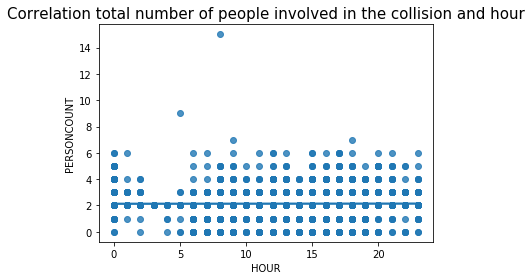

In [17]:
sns.regplot(x="HOUR", y="PERSONCOUNT", data=df)
plt.title('Correlation total number of people involved in the collision and hour', size=15)
plt.show()

When tested for the correlation between hours and number of people involved, the score is only 0.004. This figure is shallow to qualify for a correlation (0.5).

In [18]:
df[['HOUR','PERSONCOUNT']].corr()

HOUR  PERSONCOUNT
HOUR         1.000000     0.004126
PERSONCOUNT  0.004126     1.000000

Below is a visualization of the number of people involved in the collision in 24 hours.

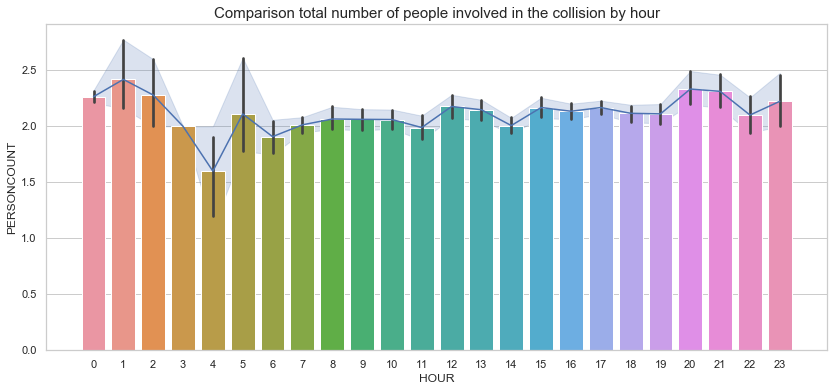

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(14,6))
sns.barplot(x="HOUR", y="PERSONCOUNT", data=df)
sns.lineplot(x="HOUR", y="PERSONCOUNT", data=df)
plt.title('Comparison total number of people involved in the collision by hour', size=15)
plt.show()

In [20]:
grouped_df5 = df[['HOUR','PERSONCOUNT']].groupby(['HOUR'],as_index=False).mean()
grouped_df5.columns = ['HOUR', 'AVG_PERSONCOUNT']
grouped_df5.sort_values(by='HOUR', ignore_index=True)

HOUR  AVG_PERSONCOUNT
0      0         2.265018
1      1         2.419355
2      2         2.280000
3      3         2.000000
4      4         1.600000
5      5         2.111111
6      6         1.908333
7      7         2.013652
8      8         2.065534
9      9         2.062718
10    10         2.061111
11    11         1.989418
12    12         2.177606
13    13         2.148594
14    14         2.007220
15    15         2.168168
16    16         2.134940
17    17         2.168013
18    18         2.116667
19    19         2.111554
20    20         2.333333
21    21         2.312500
22    22         2.101124
23    23         2.223881

## **``Day`` Variable**

Below, visualize the total number of people involved in a collision by **day and severity type**.

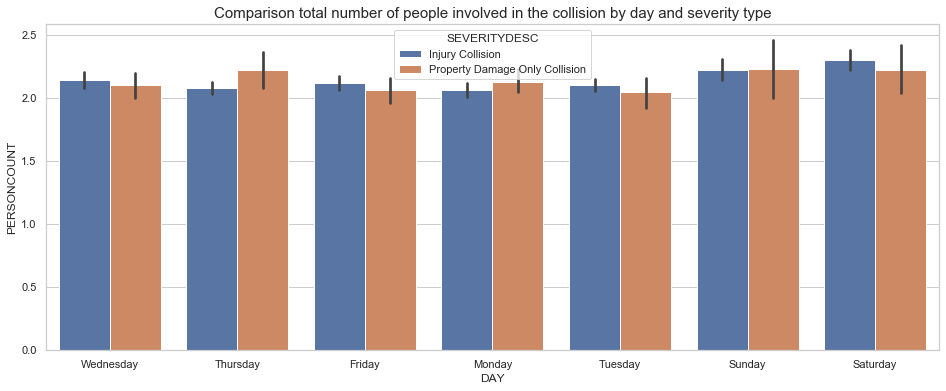

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,6))
ax = sns.barplot(x="DAY", y="PERSONCOUNT", hue='SEVERITYDESC', data=df)
plt.title('Comparison total number of people involved in the collision by day and severity type', size=15)
plt.show()

Below, a boxplot visualizes the distribution of the number of people involved in the collision by **day**. In this boxplot, we can also see the outliers in each data. The outlier data on **Wednesday** has the most considerable value in the data.

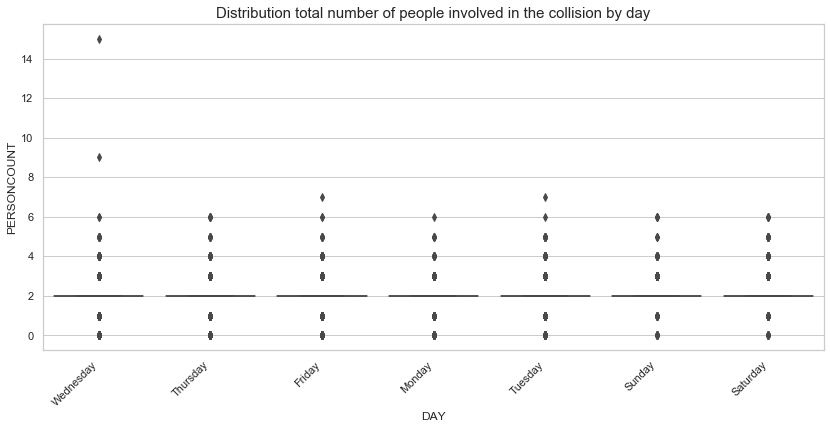

In [22]:
plt.figure(figsize=(14,6))
ax11 = sns.boxplot(x="DAY", y="PERSONCOUNT", data=df)
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribution total number of people involved in the collision by day', size=15)
plt.show()

Monday, Thursday, and Tuesday are the days with the smallest average number of people involved in a collision.

In [23]:
grouped_df3 = df[['DAY','PERSONCOUNT']].groupby(['DAY'],as_index=False).mean()
grouped_df3.columns = ['DAY', 'AVG_PERSONCOUNT']
grouped_df3.sort_values(by='AVG_PERSONCOUNT', ignore_index=True)

DAY  AVG_PERSONCOUNT
0     Monday         2.069672
1   Thursday         2.093548
2    Tuesday         2.097612
3     Friday         2.110985
4  Wednesday         2.135699
5     Sunday         2.222222
6   Saturday         2.291883

## **``Month`` Variable**

Below, a boxplot visualizes the distribution of the number of people involved in the collision by **month**. In this boxplot, we can also see the outliers in each data. The outlier data on **June** has the most considerable value in the data.

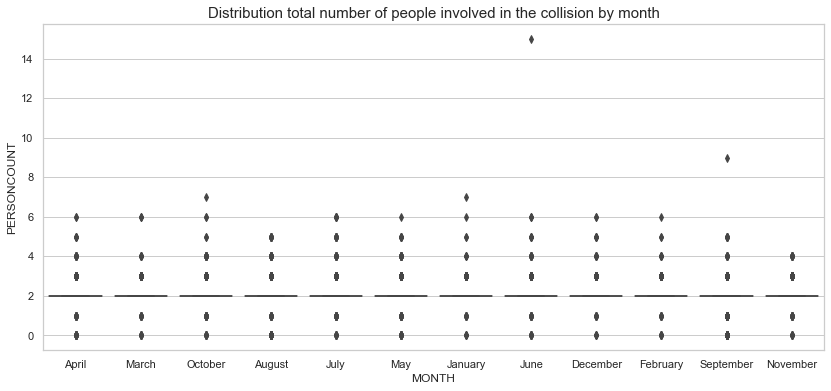

In [24]:
plt.figure(figsize=(14,6))
ax12 = sns.boxplot(x="MONTH", y="PERSONCOUNT", data=df)
plt.title('Distribution total number of people involved in the collision by month', size=15)
plt.show()

September, April, and November are the months with the smallest number of people involved in a collision.

In [25]:
grouped_df4 = df[['MONTH','PERSONCOUNT']].groupby(['MONTH'],as_index=False).mean()
grouped_df4.columns = ['MONTH','AVG_PERSONCOUNT']
grouped_df4.sort_values(by='AVG_PERSONCOUNT', ignore_index=True)

MONTH  AVG_PERSONCOUNT
0   September         2.007105
1       April         2.088636
2    November         2.091168
3      August         2.113821
4       March         2.119318
5    February         2.125000
6     January         2.125402
7     October         2.153226
8         May         2.153976
9    December         2.186131
10       June         2.189036
11       July         2.217042

## **``Weather`` Variable**

Below, a boxplot visualizes the distribution of the number of people involved in the collision by **weather**. In this boxplot, we can also see the outliers in each data.The outlier data on **Clear** weather has the most considerable value in the data.

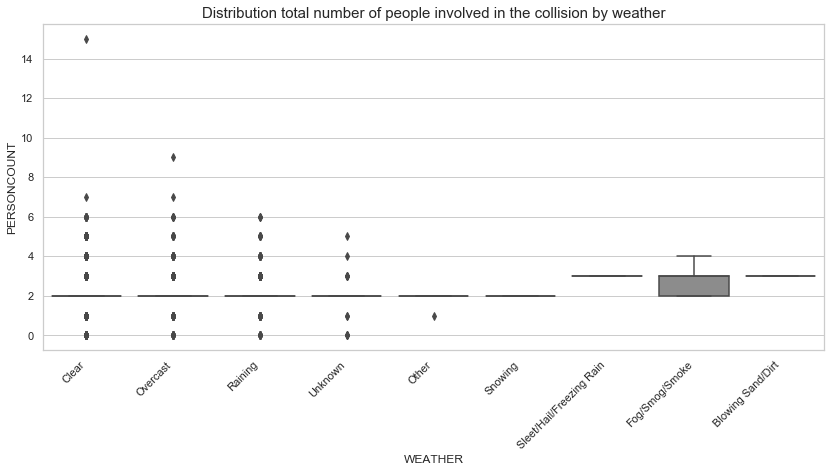

In [26]:
plt.figure(figsize=(14,6))
ax13 = sns.boxplot(x="WEATHER", y="PERSONCOUNT", data=df)
ax13.set_xticklabels(ax13.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribution total number of people involved in the collision by weather', size=15)
plt.show()

Other, Unknown, and Snowing are the weathers with the smallest number of people involved in a collision. When we want to predict severity, it looks like we need to remove 'unknown' weather.

In [27]:
grouped_df6 = df[['WEATHER','PERSONCOUNT']].groupby(['WEATHER'],as_index=False).mean()
grouped_df6.columns = ['WEATHER', 'AVG_PERSONCOUNT']
grouped_df6.sort_values(by='AVG_PERSONCOUNT', ignore_index=True)

WEATHER  AVG_PERSONCOUNT
0                     Other         1.857143
1                   Unknown         1.991071
2                   Snowing         2.000000
3                     Clear         2.122991
4                   Raining         2.139731
5                  Overcast         2.184576
6            Fog/Smog/Smoke         2.800000
7         Blowing Sand/Dirt         3.000000
8  Sleet/Hail/Freezing Rain         3.000000

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>Location & Condition Analysis</h4>
</div>    

## **``Address Type`` Variable**

Below, a boxplot visualizes the distribution of the number of people involved in the collision by **address type**. In this boxplot, we can also see the outliers in each data. The outlier data on **Intersection** has the most considerable value in the data.

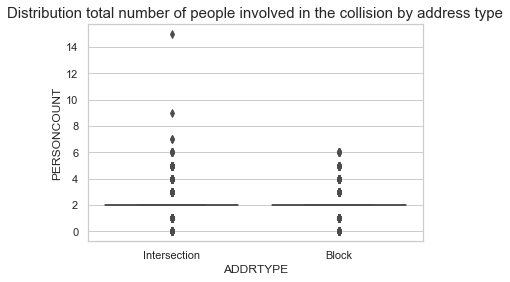

In [28]:
sns.boxplot(x="ADDRTYPE", y="PERSONCOUNT", data=df)
plt.title('Distribution total number of people involved in the collision by address type', size=15)
plt.show()

Below is a table of the average number of people involved in a collision based on the **address type and severity description**.

In [29]:
grouped_df2 = df[['SEVERITYDESC','ADDRTYPE','PERSONCOUNT']].groupby(['SEVERITYDESC','ADDRTYPE'],as_index=False).mean()
grouped_pv2 = grouped_df2.pivot(index='ADDRTYPE',columns='SEVERITYDESC').fillna(0) 
grouped_pv2

PERSONCOUNT                               
SEVERITYDESC Injury Collision Property Damage Only Collision
ADDRTYPE                                                    
Block                2.139698                       2.080745
Intersection         2.125947                       2.177650

## **``Road Condition`` Variable**

Below, a boxplot visualizes the distribution of the number of people involved in the collision by **road condition**. In this boxplot, we can also see the outliers in each data. The outlier data on **Dry** condition has the most considerable value in the data.

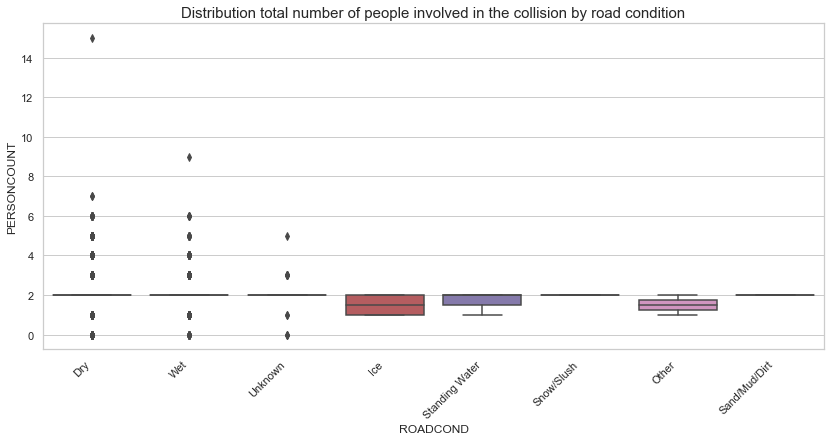

In [30]:
plt.figure(figsize=(14,6))
ax1 = sns.boxplot(x="ROADCOND", y="PERSONCOUNT", data=df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribution total number of people involved in the collision by road condition', size=15)
plt.show()

Below is a table of the average number of people involved in a collision based on the **address type and road condition**.

In [31]:
grouped_df1 = df[['ADDRTYPE','ROADCOND','PERSONCOUNT']].groupby(['ADDRTYPE','ROADCOND'],as_index=False).mean()
grouped_pv1 = grouped_df1.pivot(index='ADDRTYPE',columns='ROADCOND').fillna(0) 
grouped_pv1

PERSONCOUNT                                                     \
ROADCOND             Dry  Ice Other Sand/Mud/Dirt Snow/Slush Standing Water   
ADDRTYPE                                                                      
Block           2.141807  1.5   1.0           0.0        2.0            1.5   
Intersection    2.129479  1.5   2.0           2.0        2.0            2.0   

                                  
ROADCOND       Unknown       Wet  
ADDRTYPE                          
Block         2.031250  2.111111  
Intersection  1.982759  2.161074

## **``Light Condition`` Variable**

Below, a boxplot visualizes the distribution of the number of people involved in the collision by **light condition**. In this boxplot, we can also see the outliers in each data.The outlier data on **Daylight** condition has the most considerable value in the data.

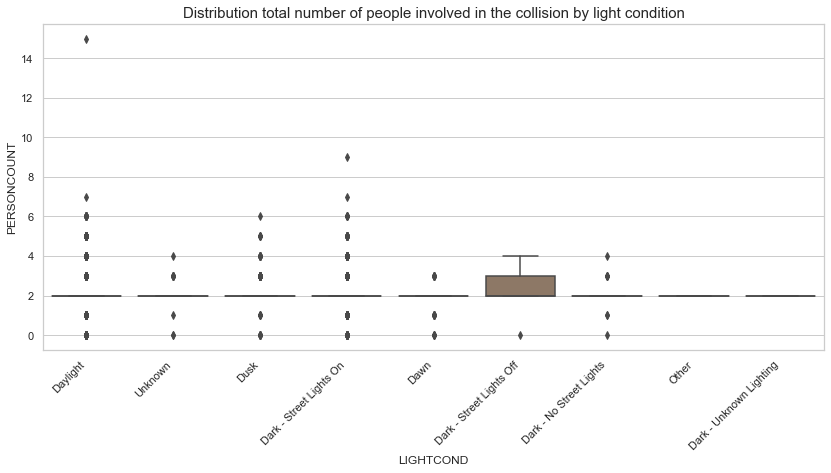

In [32]:
plt.figure(figsize=(14,6))
ax2 = sns.boxplot(x="LIGHTCOND", y="PERSONCOUNT", data=df)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Distribution total number of people involved in the collision by light condition', size=15)
plt.show()

Below is a table of the average number of people involved in a collision based on the **address type and light condition**.

In [33]:
grouped_df2 = df[['ADDRTYPE','LIGHTCOND','PERSONCOUNT']].groupby(['ADDRTYPE','LIGHTCOND'],as_index=False).mean()
grouped_pv2 = grouped_df2.pivot(index='ADDRTYPE',columns='LIGHTCOND').fillna(0) 
grouped_pv2

PERSONCOUNT                           \
LIGHTCOND    Dark - No Street Lights Dark - Street Lights Off   
ADDRTYPE                                                        
Block                       2.076923                 2.300000   
Intersection                2.100000                 2.222222   

                                                                        \
LIGHTCOND    Dark - Street Lights On Dark - Unknown Lighting      Dawn   
ADDRTYPE                                                                 
Block                       2.148936                     0.0  1.911111   
Intersection                2.227036                     2.0  1.903226   

                                                  
LIGHTCOND     Daylight      Dusk Other   Unknown  
ADDRTYPE                                          
Block         2.131726  2.208791   0.0  2.025000  
Intersection  2.109347  2.235294   2.0  2.075472

# **``Collision Map `` that Involves Cyclists in ``Seattle``**

The map below was created using Folium. Using latitude and longitude features, we can recognise the number of collisions involving cyclists in Seattle. Also, if the map is expanded, details of the collision position will be observed.

In [34]:
seattle_map = folium.Map(location=[47.608013, -122.335167], zoom_start=12)
incidents = plugins.MarkerCluster().add_to(seattle_map)

for lat, lng, label, in zip(df.Y, df.X, df.SEVERITYDESC):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
seattle_map

<hr>

# **``Model Building `` Logistic Regression**

**What is Logistic Regression?**

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". 

In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. 

Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.

In a binary logistic regression model, the dependent variable has two levels (categorical). Outputs with more than two values are modeled by multinomial logistic regression and, if the multiple categories are ordered, by ordinal logistic regression (for example the proportional odds ordinal logistic model). The logistic regression model itself simply models probability of output in terms of input and does not perform statistical classification (it is not a classifier), though it can be used to make a classifier, for instance by choosing a cutoff value and classifying inputs with probability greater than the cutoff as one class, below the cutoff as the other; this is a common way to make a binary classifier. The coefficients are generally not computed by a closed-form expression, unlike linear least squares. The logistic regression as a general statistical model was originally developed and popularized primarily by Joseph Berkson, beginning in Berkson (1944), where he coined "logit". **Source**: [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>Features Selection</h4>
</div>    

Not all features are used for model building. The features below were selected for the Logistic Regression model training.

In [36]:
df1 = df[['SEVERITYDESC', 'WEATHER', 'DAY', 'MONTH', 'ADDRTYPE', 'ROADCOND', 'LIGHTCOND', 'X', 'Y']]
df1.head(3)

SEVERITYDESC WEATHER        DAY  MONTH      ADDRTYPE ROADCOND  \
0  Injury Collision   Clear  Wednesday  April  Intersection      Dry   
1  Injury Collision   Clear   Thursday  April         Block      Dry   
2  Injury Collision   Clear     Friday  March  Intersection      Dry   

  LIGHTCOND           X          Y  
0  Daylight -122.320780  47.614076  
1  Daylight -122.312857  47.599218  
2   Unknown -122.328913  47.613466

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>Cleaning 'Unknown' Values</h4>
</div>    

The 'unknown' values in the WEATHER, LIGHTCOND, and ROADCOND fields need to be removed. This value needs to be deleted so that when using one hot encoder, this value is not used as a separate column. This is because the value of 'unknown' is difficult to understand.

In [37]:
df1['WEATHER'] = df1['WEATHER'].replace(to_replace='Unknown', value=np.nan)
df1['ROADCOND'] = df1['ROADCOND'].replace(to_replace='Unknown', value=np.nan)
df1['LIGHTCOND'] = df1['LIGHTCOND'].replace(to_replace='Unknown', value=np.nan)
df1.dropna(inplace=True)

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>Splitting Dataset</h4>
</div>    

**Training & Test Sets**

In machine learning, a common task is the study and construction of algorithms that can learn from and make predictions on data. Such algorithms function by making data-driven predictions or decisions, through building a mathematical model from input data. The data used to build the final model usually comes from multiple datasets. In particular, three datasets are commonly used in different stages of the creation of the model.

The model is initially fit on a **training dataset**, which is a set of examples used to fit the parameters (e.g. weights of connections between neurons in artificial neural networks) of the model. The model (e.g. a neural net or a naive Bayes classifier) is trained on the training dataset using a supervised learning method, for example using optimization methods such as gradient descent or stochastic gradient descent. In practice, the training dataset often consists of pairs of an input vector (or scalar) and the corresponding output vector (or scalar), where the answer key is commonly denoted as the target (or label). 

The current model is run with the training dataset and produces a result, which is then compared with the target, for each input vector in the training dataset. Based on the result of the comparison and the specific learning algorithm being used, the parameters of the model are adjusted. The model fitting can include both variable selection and parameter estimation.

Finally, the **test dataset** is a dataset used to provide an unbiased evaluation of a final model fit on the training dataset. If the data in the test dataset has never been used in training (for example in cross-validation), the test dataset is also called a holdout dataset. Source: [Wikipedia](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets)

First, the data is split into X (features / independent variable) and Y (target / dependent variable). Second, the data is encoded using the one-hot encoder. Finally, the dataset is split using a train-test-split function, with a composition of 30 percent test set and 70 percent training set.

In [38]:
X = df1[['WEATHER', 'DAY', 'MONTH', 'ADDRTYPE', 'ROADCOND', 'LIGHTCOND']]
Y = df1[['SEVERITYDESC']]

In [39]:
X = pd.get_dummies(X, drop_first=True, columns=['WEATHER', 'DAY', 'MONTH', 'ADDRTYPE', 'ROADCOND', 'LIGHTCOND'])
X.head(3)

WEATHER_Clear  WEATHER_Fog/Smog/Smoke  WEATHER_Other  WEATHER_Overcast  \
0              1                       0              0                 0   
1              1                       0              0                 0   
3              1                       0              0                 0   

   WEATHER_Raining  WEATHER_Sleet/Hail/Freezing Rain  WEATHER_Snowing  \
0                0                                 0                0   
1                0                                 0                0   
3                0                                 0                0   

   DAY_Monday  DAY_Saturday  DAY_Sunday  DAY_Thursday  DAY_Tuesday  \
0           0             0           0             0            0   
1           0             0           0             1            0   
3           0             0           0             1            0   

   DAY_Wednesday  MONTH_August  MONTH_December  MONTH_February  MONTH_January  \
0              1             0               0               0              0   
1              0             0               0               0              0   
3              0             0               0               0              0   

   MONTH_July  MONTH_June  MONTH_March  MONTH_May  MONTH_November  \
0           0           0            0          0               0   
1           0           0            0          0               0   
3           0           0            1          0               0   

   MONTH_October  MONTH_September  ADDRTYPE_Intersection  ROADCOND_Ice  \
0              0                0                      1             0   
1              0                0                      0             0   
3              0                0                      1             0   

   ROADCOND_Other  ROADCOND_Sand/Mud/Dirt  ROADCOND_Snow/Slush  \
0               0                       0                    0   
1               0                       0                    0   
3               0                       0                    0   

   ROADCOND_Standing Water  ROADCOND_Wet  LIGHTCOND_Dark - Street Lights Off  \
0                        0             0                                   0   
1                        0             0                                   0   
3                        0             0                                   0   

   LIGHTCOND_Dark - Street Lights On  LIGHTCOND_Dark - Unknown Lighting  \
0                                  0                                  0   
1                                  0                                  0   
3                                  0                                  0   

   LIGHTCOND_Dawn  LIGHTCOND_Daylight  LIGHTCOND_Dusk  LIGHTCOND_Other  
0               0                   1               0                0  
1               0                   1               0                0  
3               0                   1               0                0

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3, random_state=0)

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>Model Training</h4>
</div>    

The Logistic Regression model is trained using the parameter C = 0.01, solver = 'liblinear'.

In [41]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>Model Evaluation</h4>
</div>    

**Jaccard Index**

The Jaccard index, also known as Intersection over Union and the Jaccard similarity coefficient (originally given the French name coefficient de communauté by Paul Jaccard), is a statistic used for gauging the similarity and diversity of sample sets. The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets. The Jaccard distance, which measures dissimilarity between sample sets, is complementary to the Jaccard coefficient and is obtained by subtracting the Jaccard coefficient from 1, or, equivalently, by dividing the difference of the sizes of the union and the intersection of two sets by the size of the union. Source: [Wikipedia](https://en.wikipedia.org/wiki/Jaccard_index)

Jaccard similarity score in this project is 0.88. It's a relatively high result.

In [65]:
jaccard_similarity_score(y_test, yhat)

0.8853704876504117

**Log Loss**

In machine learning and mathematical optimization, loss functions for classification are computationally feasible loss functions representing the price paid for inaccuracy of predictions in classification problems (problems of identifying which category a particular observation belongs to). Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. Source: [Wikipedia](https://en.wikipedia.org/wiki/Loss_functions_for_classification)

Log loss score in this project is 0.36. It's a relatively low result.

In [43]:
log_loss(y_test, yhat_prob)

0.36069182774186537

**Classification Report**

The classification report builds a text report showing the main classification metrics.
*    Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*    Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

* F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

In this report, the precision for **'Injury Collision' Class is 0.89 (89 percent)**. It means when the model predicts 100 times 'Injury Collision', only 89 prediction is correct. But, the precision for 'Property Damage Only Collision' class is 0 (zero). It means the model always gets wrong when predicts 'Property Damage Only Collision' class. Recall for 'Injury Collision' Class is 1 (100 percent). It means when the model can predict all actual values in this class.
On the other side, recall for 'Property Damage Only Collision' class is 0 (zero). It means the model can't predict actual values.

In [44]:
print(classification_report(y_test, yhat))

                                precision    recall  f1-score   support

              Injury Collision       0.89      1.00      0.94      1398
Property Damage Only Collision       0.00      0.00      0.00       181

                      accuracy                           0.89      1579
                     macro avg       0.44      0.50      0.47      1579
                  weighted avg       0.78      0.89      0.83      1579



**Confusion Matrix**

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table). Source: [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

In the confusion matrix below, we can see a TP of 1398. It means that the entire class (0) 'Injury Collision' can be predicted entirely. However, the 181 'Property Damage Only Collision' class are predicted to be 'Injury Collision' (False Positive).

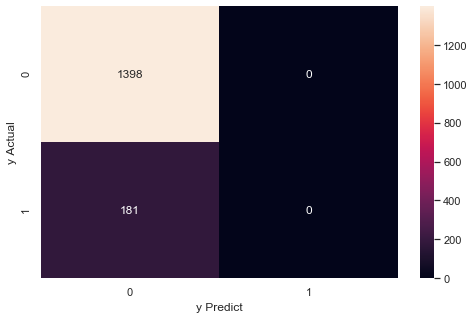

In [45]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, yhat), annot=True, fmt=".0f", ax = ax)
plt.xlabel('y Predict')
plt.ylabel('y Actual')
plt.show()

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <h4>INSIGHT: Time and condition with high probability of injury collision</h4>
</div>    

One of the advantages of using Logistic Regression is that we can get probabilities from predictions. This probability we can merge with the initial dataset. Thus, we can analyze **times and conditions** which have **high or low probability**. A new column is added to the dataset with the name 'Injury_Proba'.

In [46]:
df1['Injury_Proba'] = LR.predict_proba(X)[:, 0]
df1.head()

SEVERITYDESC WEATHER        DAY    MONTH      ADDRTYPE  \
0                Injury Collision   Clear  Wednesday    April  Intersection   
1                Injury Collision   Clear   Thursday    April         Block   
3  Property Damage Only Collision   Clear   Thursday    March  Intersection   
4                Injury Collision   Clear     Monday  October         Block   
5                Injury Collision   Clear  Wednesday   August         Block   

  ROADCOND LIGHTCOND           X          Y  Injury_Proba  
0      Dry  Daylight -122.320780  47.614076      0.888689  
1      Dry  Daylight -122.312857  47.599218      0.853760  
3      Dry  Daylight -122.312464  47.652976      0.895193  
4      Dry  Daylight -122.337054  47.695963      0.860625  
5      Dry  Daylight -122.383315  47.643384      0.855392

Because the precision and recall scores for 'Injury Collision' are very high, the filtered dataset only displays this class. Besides, the precision and recall scores for the 'Property Damage Only Collision' class are also very low or zero.

This filter will also support analyzing what time and conditions on a low and high probability of an injury collision.

In [47]:
df2 = df1[df1['SEVERITYDESC']=='Injury Collision']
df2.head()

SEVERITYDESC WEATHER        DAY    MONTH      ADDRTYPE ROADCOND  \
0  Injury Collision   Clear  Wednesday    April  Intersection      Dry   
1  Injury Collision   Clear   Thursday    April         Block      Dry   
4  Injury Collision   Clear     Monday  October         Block      Dry   
5  Injury Collision   Clear  Wednesday   August         Block      Dry   
6  Injury Collision   Clear    Tuesday   August         Block      Dry   

  LIGHTCOND           X          Y  Injury_Proba  
0  Daylight -122.320780  47.614076      0.888689  
1  Daylight -122.312857  47.599218      0.853760  
4  Daylight -122.337054  47.695963      0.860625  
5  Daylight -122.383315  47.643384      0.855392  
6  Daylight -122.327480  47.542630      0.852444

<hr>

## **The ``Safest Time`` for Cycling Activities**

#### **What is the safest ``month`` to host a cycling event?**
The months with the lowest 'injury collision' probability are **December, January, and November.** These months have a low injury collision probability.

In [48]:
df2.groupby('MONTH')[['Injury_Proba']].mean().sort_values(by='Injury_Proba')

Injury_Proba
MONTH                  
December       0.841393
January        0.848370
November       0.851089
February       0.855627
March          0.855661
June           0.857210
April          0.858153
October        0.864046
August         0.865966
September      0.869209
July           0.872196
May            0.875450

In [49]:
day_analysis_g = df2[['DAY','MONTH','Injury_Proba']].groupby(['DAY','MONTH'],as_index=False).mean()
day_analysis_pv = day_analysis_g.pivot(index='DAY',columns='MONTH').fillna(0) 

In [50]:
weather_analysis_g = df2[['WEATHER','MONTH','Injury_Proba']].groupby(['WEATHER','MONTH'],as_index=False).mean()
weather_analysis_pv = weather_analysis_g.pivot(index='WEATHER',columns='MONTH').fillna(0) 

#### **What is the safest day and weather to host a cycling event in ``December``?**

The days with the lowest 'injury collision' probability are **Friday, Sunday, and Tuesday.** The weather with the lowest 'injury collision' probability is **Blowing Sand/Dirt**. These times conditions have a low injury collision probability.

In [51]:
day_analysis_pv.loc[:, ('Injury_Proba','December')].to_frame().sort_values(by=('Injury_Proba','December')).head(3)

Injury_Proba
            December
DAY                 
Friday      0.824440
Sunday      0.839877
Tuesday     0.840901

In [52]:
weather_analysis_pv.loc[:, ('Injury_Proba','December')].to_frame().sort_values(by=('Injury_Proba','December')).head(3)

Injury_Proba
                      December
WEATHER                       
Blowing Sand/Dirt     0.000000
Other                 0.000000
Snowing               0.780898

#### **What is the safest day to host a cycling event in ``January``?**
The days with the lowest 'injury collision' probability are **Saturday, Friday, and Monday**. The weather with the lowest 'injury collision' probability is **Blowing Sand/Dirt**. These times conditions have a low injury collision probability.

In [53]:
day_analysis_pv.loc[:, ('Injury_Proba','January')].to_frame().sort_values(by=('Injury_Proba','January')).head(3)

Injury_Proba
              January
DAY                  
Saturday     0.838612
Friday       0.842121
Monday       0.845577

In [54]:
weather_analysis_pv.loc[:, ('Injury_Proba','January')].to_frame().sort_values(by=('Injury_Proba','January')).head(3)

Injury_Proba
                       January
WEATHER                       
Blowing Sand/Dirt          0.0
Fog/Smog/Smoke             0.0
Other                      0.0

#### **What is the safest day to host a cycling event in ``November``?**
The days with the lowest 'injury collision' probability are **Friday, Tuesday, and Monday**. The weather with the lowest 'injury collision' probability is **Snowing**. These times conditions have a low injury collision probability.

In [55]:
day_analysis_pv.loc[:, ('Injury_Proba','November')].to_frame().sort_values(by=('Injury_Proba','November')).head(3)

Injury_Proba
            November
DAY                 
Friday      0.836035
Tuesday     0.843810
Monday      0.846371

In [56]:
weather_analysis_pv.loc[:, ('Injury_Proba','November')].to_frame().sort_values(by=('Injury_Proba','November')).head(3)

Injury_Proba
                      November
WEATHER                       
Other                 0.000000
Snowing               0.000000
Blowing Sand/Dirt     0.792989

<hr>

## **The ``Most Dangerous Location`` for Cycling Activities**

In [57]:
road_analysis_g = df2[['ADDRTYPE','ROADCOND','Injury_Proba']].groupby(['ADDRTYPE','ROADCOND'],as_index=False).mean()
road_analysis_pv = road_analysis_g.pivot(index='ROADCOND',columns='ADDRTYPE').fillna(0) 

In [58]:
light_analysis_g = df2[['ADDRTYPE','LIGHTCOND','Injury_Proba']].groupby(['ADDRTYPE','LIGHTCOND'],as_index=False).mean()
light_analysis_pv = light_analysis_g.pivot(index='LIGHTCOND',columns='ADDRTYPE').fillna(0) 

#### **What are ``the most dangerous`` light and road conditions in ``Block`` Area for cycling activities?**
The road condition with the highest 'injury collision' probability in Block Area is **Dry** condition. The light condition with the highest 'injury collision' probability in Block Area is **Daylight** condition. These location conditions have a high injury collision probability.

In [59]:
road_analysis_pv.loc[:, ('Injury_Proba','Block')].to_frame().sort_values(by=('Injury_Proba','Block'), ascending=False).head(3)

Injury_Proba
                Block
ROADCOND             
Dry          0.843306
Other        0.840114
Ice          0.822746

In [60]:
light_analysis_pv.loc[:, ('Injury_Proba','Block')].to_frame().sort_values(by=('Injury_Proba','Block'), ascending=False).head(3)

Injury_Proba
                               Block
LIGHTCOND                           
Daylight                    0.848434
Dark - Street Lights On     0.813132
Dusk                        0.792318

#### **What are ``the most dangerous`` light and road conditions in ``Intersection`` Area for cycling activities?**
The road condition with the highest 'injury collision' probability in Intersection Area is **Ice** condition. The light condition with the highest 'injury collision' probability in Intersection Area is **Daylight** condition. These location conditions have a high injury collision probability.

In [61]:
road_analysis_pv.loc[:, ('Injury_Proba','Intersection')].to_frame().sort_values(by=('Injury_Proba','Intersection'), ascending=False).head(3)

Injury_Proba
           Intersection
ROADCOND               
Ice            0.895254
Snow/Slush     0.885150
Dry            0.882451

In [62]:
light_analysis_pv.loc[:, ('Injury_Proba','Intersection')].to_frame().sort_values(by=('Injury_Proba','Intersection'), ascending=False).head(3)

Injury_Proba
                        Intersection
LIGHTCOND                           
Daylight                    0.887423
Dark - Unknown Lighting     0.862743
Dark - Street Lights On     0.857914

# **``Most Dangerous Locations`` Map for Cyclist in ``Seattle``**

The map below shows the most dangerous locations for cyclists in Seattle. The location points shown below have an 'injury collision' **probability of above 90 per cent**. Event organizers need to be careful at this location. Before the event starts, the committee needs to monitor the road conditions around that spot. If it is dangerous, the committee can repair it or give a unique sign to be more careful.

In [63]:
df3 = df2[df2['Injury_Proba'] > 0.9].sort_values(by='Injury_Proba', ascending=False, ignore_index=True)
df3.head(3)

SEVERITYDESC WEATHER        DAY    MONTH      ADDRTYPE ROADCOND  \
0  Injury Collision   Clear   Thursday  October  Intersection      Wet   
1  Injury Collision   Clear  Wednesday  October  Intersection      Wet   
2  Injury Collision   Clear    Tuesday      May  Intersection      Wet   

  LIGHTCOND           X          Y  Injury_Proba  
0  Daylight -122.306849  47.691236      0.913140  
1  Daylight -122.291051  47.624951      0.910372  
2  Daylight -122.328235  47.670856      0.909762

In [64]:
seattle_map2 = folium.Map(location=[47.608013, -122.335167], zoom_start=12)
incidents2 = folium.map.FeatureGroup()

for lat, lng, in zip(df3.Y, df3.X):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

latitudes = list(df3.Y)
longitudes = list(df3.X)
labels = list(round(df3.Injury_Proba, 3))

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(seattle_map2)    
    
seattle_map2.add_child(incidents2)

<hr>

# __Results and Discussion__ <a name="results"></a>

Cycling event organizers may consider the findings of this project before holding a cycling event. Organizers need to plan when the best time to maintain the event is. Besides, also be aware of points on the road in Seattle that have a high probability of injury collisions.

The safe months for hosting events for cyclists are December, January, and November. These three months have the lowest average probability of injury collision compared to other months. If the committee chooses December, then the safest choice of days is Friday, Saturday, and Tuesday. The safe weather conditions this month are blowing sand/dirt. The choice of safe days and weather in January is Saturday, Friday and Monday, with blowing sand/dirt weather conditions. This condition has the lowest average 'injury collision' probability. The following safest month option is November. This month, the committee can choose Friday, Tuesday, and Monday. However, unlike the month choices above, the safe weather conditions in November are snowing. This condition has the lowest probability of 'injury collision'.

Apart from time conditions, the committee also needs to be aware of dangerous spots for cyclists. This spot has a high probability of injury collision involving motorists and cyclists. The block area's most dangerous conditions are 'dry' road conditions and 'daylight' lighting conditions. This condition has the highest average probability of injury collision. How about the intersection area? The committee must be aware of spots with 'ice' road conditions and 'daylight' lighting conditions. Before the event starts, the committee needs to avoid routes with these conditions.

## __Conclusion__ <a name="conclusion"></a>

* The safest months to host cycling events are December, January and November. Of these three months, Friday is the safe choice. Despite the 'daylight' lighting conditions, the committee still needs to be careful in 'dry' and 'ice' road conditions.

* This dataset has limitations both in quality and quantity. If the class 'property damage only collision' is added, the precision and recall will increase. Also, if the dataset contains borough or district features, we can create a choropleth map.

* Event organizers can collaborate with the Seattle Department of Transportation (SDOT) to ensure safe cycling events with the best choice of cycling times and routes.

<hr>